In [294]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt

/tmp/ipykernel_4659/1297193157.py:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_4659/1297193157.py:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_4659/1297193157.py:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_4659/1297193157.py:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_4659/1297193157.py:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_4659/1297193157.py:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future

Text(0, 0.5, 'y[kpc]')

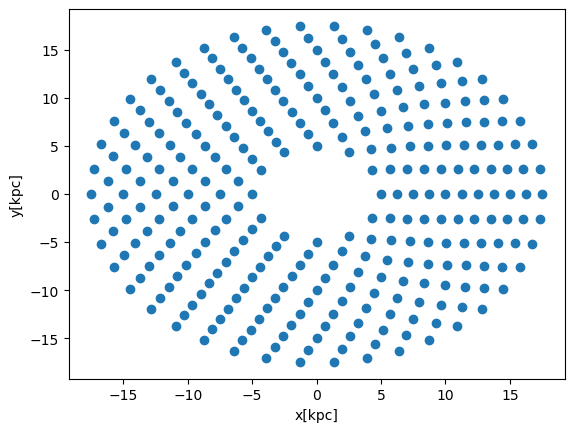

In [295]:
"""Intializes 297 points around 0,0 in x-y plane in data frame df"""
R_min = 25 # in kpc
M = 1 # in solar masses

R = []
T = []
for i in range(11):
    T.append(12+3*i)
    R.append((.2 + i*(.05))*R_min )
    
def rtpairs(r, n):

    df = pd.DataFrame(columns=['m','x', 'y'])
    for i in range(len(r)):
        for j in range(n[i]):    
            df = df.append({'x': r[i] * np.cos(j*(2 * np.pi / n[i])),
                            'y': r[i] * np.sin(j*(2 * np.pi / n[i]))},
                           ignore_index=True)
    return df

df = rtpairs(R, T)
df['z'] = np.zeros(297)
df['m'] = np.ones(297) * 1e-35

plt.scatter(df['x'],df['y'])
plt.xlabel('x[kpc]')
plt.ylabel('y[kpc]')

In [296]:
def v_0(x, y, M):
    """Velocity Function in 2d
    r^2 = x^2 + y^2 from mass M
    """
    G = 4491.9 # kpc^3 / (M * T^2) where  solar masses and T = 10^8 years
    e_soft = .03  #softing parameter  
    r = np.sqrt(x**2 + y ** 2)
    v = np.sqrt( (G*M*r / (r ** 2 + e_soft**2 )  ) )
    theta = np.arccos(x/r)
    vy = v*np.cos(theta)
    theta = np.arcsin(y/r)
    vx = -v*np.sin(theta) 
    return [vx,vy]


df['v_x'] , df['v_y'] = v_0(df['x'],df['y'],M) #velocity for ring points
df['v_z'] = np.zeros(297)

In [297]:
"""Rotates df by inclincation angles 15 for gal A and 60 for gal B of rings into df_ringA and df_ringB
    Both gal A and gal B are still centered at (0,0,0)
"""
def rot(theta):
    c = np.cos(theta)
    s = np.sin(theta)
    a = 1 - np.cos(theta)
    rot_mat = np.array([[a+c, 0, 0],
                       [0, c, -s],
                       [0, s, c]])
    return rot_mat


##Rotation for Galaxy A
rot_matA = rot(np.radians(-15))

df_ringA = pd.DataFrame(columns=['m','x', 'y','z','v_x','v_y','v_z'])
df_ringB = pd.DataFrame(columns=['m','x', 'y','z','v_x','v_y','v_z'])
df_ringA['m'] = np.ones(297) * 1e-35 # for debugging in glnemo2
df_ringB['m'] = np.ones(297) * 1e-35 # for debugging in glnemo2
df_ringA['x'], df_ringA['y'], df_ringA['z'] = rot_matA.dot([df['x'],df['y'],df['z']])
df_ringA['v_x'], df_ringA['v_y'], df_ringA['v_z'] = rot_matA.dot([df['v_x'],df['v_y'],df['v_z']])


## Rotation for galaxy B
rot_matB = rot(np.radians(-60))

df_ringB['x'], df_ringB['y'], df_ringB['z'] = rot_matB.dot([df['x'],df['y'],df['z']])
df_ringB['v_x'], df_ringB['v_y'], df_ringB['v_z'] = rot_matB.dot([df['v_x'],df['v_y'],df['v_z']])


In [298]:
#visualize RingA rotated
fig = go.Figure(data = go.Cone(
    x = df_ringA['x'],
    y = df_ringA['y'],
    z = df_ringA['z'],
    u = df_ringA['v_x'],
    v = df_ringA['v_y'],
    w = df_ringA['v_z'],
    colorscale = 'Blues',
    sizemode = "absolute",
    sizeref = 40))

fig.update_layout(
    scene = dict(aspectratio = dict(x = 1, y = 1, z = 0.8),
    camera_eye = dict(x = 1.2, y = 1.2, z = 0.6)))

fig.show()

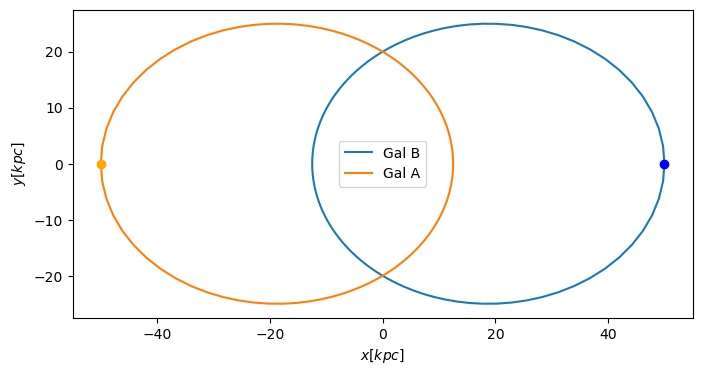

In [299]:
"""This cell plots orbits of galaxic cores and generates their intial positions and velocities
"""

m1 = 1
m2 = 1
rmin = 25
G = 4491.9
e = 0.6


phi = np.linspace(0, 2 * np.pi, 100)
phi = np.asarray(phi)

def orbit(phi):
    r = rmin * (1 + e) / (1 - e * np.cos(phi))
    x = r * np.cos(phi)
    y = r * np.sin(phi)
    vr = -e * np.sqrt(G * (m1 + m2) / (rmin * (1 + e))) * np.sin(phi)
    vphi = np.sqrt(G * (m1 + m2) / (rmin * (1 + e))) * (1 - e * np.cos(phi))
    vx = vr * np.sin(phi) - vphi *np.sin(phi)
    vy = vr * np.sin(phi) + vphi * np.cos(phi)
    return x, y, vx, vy

x1 , y1, vx1, vy1 = orbit(phi)
x2 , y2, vx2, vy2 = orbit(phi)

#center mass m1 / (m1+m2) or m2 / (m1+m2) --> .5 in every casefor m1=m2=1
x1 = x1/2
y1 = y1/2
x2 = -x2/2
y2 = -y2/2
vx1 = vx1/2
vy1 = vy1/2
vx2 = -vx2/2
vy2 = -vy2/2
phi = np.linspace(0, 2 * np.pi, 100)

##Plots figures
plt.figure(figsize=(8, 4))
plt.plot(x1, y1, label="Gal B")
plt.plot(x2, y2, label="Gal A")
t = 0
plt.plot(x2[t],y2[t],'o',c="orange")
plt.plot(x1[t],y1[t],'o',c ='blue')
plt.xlabel("$x[kpc]$")
plt.ylabel("$y[kpc]$")
plt.legend()
plt.show()

df_mass = pd.DataFrame(columns=['m','x', 'y','z','v_x','v_y','v_z'])
df_mass = pd.DataFrame(columns=['m','x', 'y','z','v_x','v_y','v_z'])

vxA, vyA = [vx2[t], vy2[t]] 
vxB, vyB = [vx1[t],vy1[t]]
xA, yA = [x2[t],y2[t]]
xB, yB = [x1[t],y1[t]]
df_mass.loc[0] = [1,xA,yA,0,vxA,vyA,0]
df_mass.loc[1] = [1,xB,yB,0,vxB,vyB,0]


In [300]:
"""Shifts rings by their respective central masses position and velocity

"""
df_ringA['x'] = df_ringA['x'] + xA
df_ringA['y'] = df_ringA['y'] + yA
df_ringA['v_x'] = df_ringA['v_x'] + vxA

df_ringA['v_y'] = df_ringA['v_y'] + vyA
df_ringB['x'] = df_ringB['x'] + xB
df_ringB['y'] = df_ringB['y'] + yB
df_ringB['v_x'] = df_ringB['v_x'] + vxB
df_ringB['v_y'] = df_ringB['v_y'] + vyB
df_ringcomp = df_ringA.append(df_ringB, ignore_index=True) #combines rings into signal dataframe

/tmp/ipykernel_4659/3340282466.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Text(0.5, 0, '$z$ [kpc]')

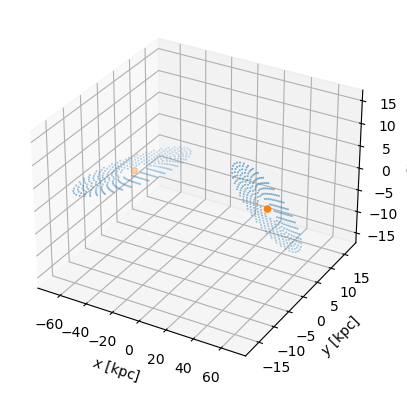

In [301]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_ringcomp['x'], df_ringcomp['y'], df_ringcomp['z'], s=0.1)
ax.scatter(df_mass['x'],df_mass['y'],df_mass['z'],'o')
ax.set_xlabel(r'$x$ [kpc]')
ax.set_ylabel(r'$y$ [kpc]')
ax.set_zlabel(r'$z$ [kpc]')

In [302]:
fig = go.Figure(data = go.Cone(
    x = df_ringcomp['x'],
    y = df_ringcomp['y'],
    z = df_ringcomp['z'],
    u = df_ringcomp['v_x'],
    v = df_ringcomp['v_y'],
    w = df_ringcomp['v_z'],
    colorscale = 'Blues',
    sizemode = "absolute",
    sizeref = 80))

fig.update_layout(
    scene = dict(aspectratio = dict(x = 1, y = 1, z = 0.8),
    camera_eye = dict(x = 1.2, y = 1.2, z = 0.6)))

fig.show()

In [303]:
# Write the data to a text file used for debugging/testing in glnemo2
mass = np.concatenate((df_mass['m'].to_numpy(),df_ringcomp['m'].to_numpy()))

X = np.concatenate((df_mass['x'].to_numpy(),df_ringcomp['x'].to_numpy()))
Y = np.concatenate((df_mass['y'].to_numpy(),df_ringcomp['y'].to_numpy()))
Z = np.concatenate((df_mass['z'].to_numpy(),df_ringcomp['z'].to_numpy()))
Vx = np.concatenate((df_mass['v_x'].to_numpy(),df_ringcomp['v_x'].to_numpy()))
Vy = np.concatenate((df_mass['v_y'].to_numpy(),df_ringcomp['v_y'].to_numpy()))
Vz = np.concatenate((df_mass['v_z'].to_numpy(),df_ringcomp['v_z'].to_numpy()))

stacked_data = np.stack([mass,X, Y, Z,Vx,Vy,Vz], axis=1)
with open("out.txt", "w") as f:
    for row in stacked_data:
        row_str = "\t".join(str(x) for x in row) + "\n"
        f.write(row_str)

35.41100454330444
(5001, 594, 3)
(5001, 297, 3)
(5001, 297, 3)


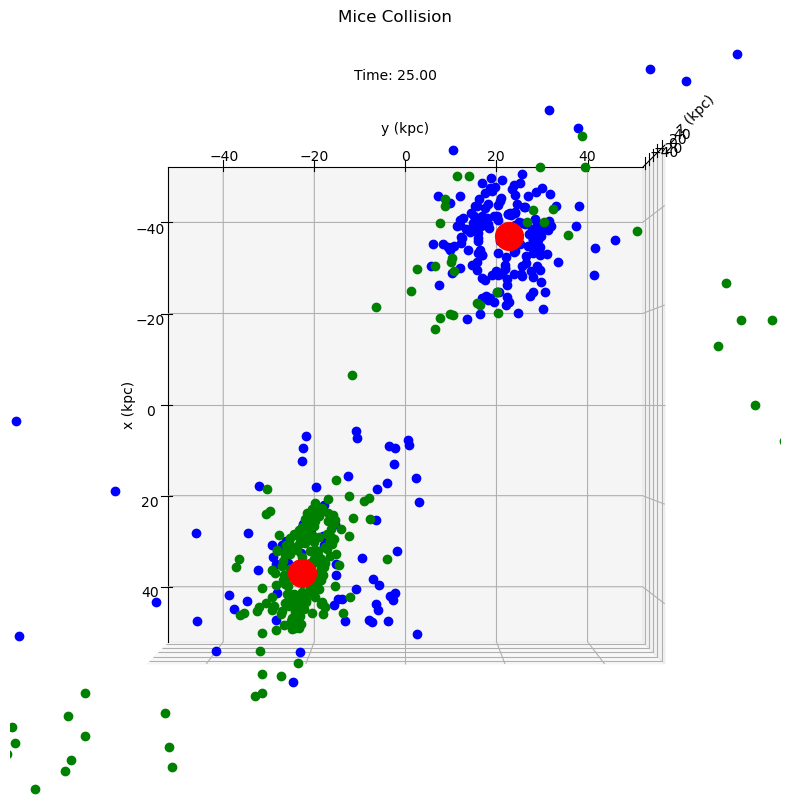

In [304]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit 
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import time

# unit system
# 

def accel_majorStars(pos: np.ndarray, G : float, M : float):
    n = 2 # number of major mass body
    A_pos = pos[0]
    B_pos = pos[1]
    a = np.zeros((n, 3)) # acceleration array

    r_vec = A_pos - B_pos 
    r_mag = np.linalg.norm(r_vec) 
    acc = -(G*M*r_vec/(r_mag**2+2**2)**(3/2))
    A_acc = acc # accel of mass body A
    B_acc = -acc # accel of mass body B

    a[0] = A_acc 
    a[1] = B_acc
    return a 

def accel_satellites(pos_satellites: np.ndarray, pos_majorStars: np.ndarray, G: float, M: float):
    n = pos_majorStars[:,0].size # number of major masses
    m = pos_satellites[:,0].size # number of satellites
    a = np.zeros((m, 3))

    for i in range(n):
        for j in range(m):
            r_vec = pos_satellites[j] - pos_majorStars[i] 
            r_mag = np.linalg.norm(r_vec) 
            a[j] = a[j] + (-G*M*r_vec/(r_mag**2+2**2)**(3/2))


    return a

def leapfrog(r_star: np.ndarray, v_star: np.ndarray, r_satellites: np.ndarray, v_satellites: np.ndarray, dt: float, G: float, M: float):

    # major stars leapfrog
    v_star = v_star+ 0.5*dt*accel_majorStars(r_star, G, M)
    r_star = r_star+ v_star*dt
    v_star = v_star+ 0.5*dt*accel_majorStars(r_star, G, M)



    # satellites leapfrog
    v_satellites = v_satellites + 0.5*dt*accel_satellites(r_satellites, r_star, G, M)
    r_satellites = r_satellites + v_satellites*dt
    v_satellites = v_satellites + 0.5*dt*accel_satellites(r_satellites, r_star, G, M)



    return r_star, v_star,r_satellites, v_satellites


# Constants
G = 4491.9 # kpc^3/(M * T)
M = 1 # 10^11 solar mass
dt = 0.005 # .1T
T = 25 # total time in 25*T where T=10e8 years 
step = int(T/dt) # total number of steps, should be INT
L_scale = 1 # kpc

# reading initialization from csv files
# and convert to numpy vectors
df_comp = df_ringcomp
df_center = df_mass

# output container (currently using python.List)
out_star = [] 
out_satellite = []

# converting position and velocity to np.narray
position_star = df_center[['x', 'y', 'z']].to_numpy()
velocity_star = df_center[['v_x', 'v_y', 'v_z']].to_numpy()
position_satellite = df_comp[['x', 'y', 'z']].to_numpy()
velocity_satellite= df_comp[['v_x', 'v_y', 'v_z']].to_numpy()


# store initial
out_star.append(position_star)
out_satellite.append(position_satellite)


start_time = time.time()

# time evolution 
for i in range(int(step)):
    position_star, velocity_star, position_satellite, velocity_satellite = leapfrog(position_star, velocity_star, position_satellite, velocity_satellite, dt = dt, G = G, M = M)
    out_star.append(position_star)
    out_satellite.append(position_satellite)

end_time = time.time()

print(end_time-start_time)

# convert position array to numpy array
out_star = np.array(out_star)
out_satellite = np.array(out_satellite)

# seperating galaxy 1 stars and galaxy 2 stars
gal1 = []
gal2 = []
for i in range(out_satellite.shape[0]):    
    temp = out_satellite[i]
    newarr = np.array_split(temp, 2) # splitting the two galaxies
    gal1.append(newarr[0])
    gal2.append(newarr[1])
gal1 = np.array(gal1)
gal2 = np.array(gal2)




############# plotting satellites

# Create the figure and axes for the plot
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=90, azim=0) # viewing angle
time_label = ax.text2D(0.5, 0.95, '', ha='center', va='top', transform=ax.transAxes)

# Create the initial point in the plot
# point, = ax.plot(out_satellite[0,:,0], out_satellite[0,:,1], out_satellite[0,:,2], 'bo')
point1, = ax.plot(gal1[0,:,0], gal1[0,:,1], gal1[0,:,2], 'bo')
point2, = ax.plot(gal2[0,:,0], gal2[0,:,1], gal2[0,:,2], 'bo')
point3, = ax.plot(out_star[0,:,0], out_star[0,:,1], out_star[0,:,2], 'bo')

# Define the update function for the animation
def update(frame):

    # for stars from galaxy 1
    point1.set_data(gal1[frame][:,0], gal1[frame][:,1])
    point1.set_3d_properties(gal1[frame][:,2])
    point1.set_color('blue')
    #point1.set_ms(3) # set the marker size

    # for stars from galaxy 2
    point2.set_data(gal2[frame][:,0], gal2[frame][:,1])
    point2.set_3d_properties(gal2[frame][:,2])
    point2.set_color('green')
    #point2.set_ms(3) # set the marker size


    # for cores
    point3.set_data(out_star[frame][:,0], out_star[frame][:,1])
    point3.set_3d_properties(out_star[frame][:,2])
    point3.set_color('red')
    point3.set_ms(20) # set marker size

    # time label
    time = frame * dt
    time_label.set_text(f'Time: {time:.2f}')  # Format the time value with 2 decimal places
    return point1, point2, point3,

# Create the animation object
anim = FuncAnimation(fig, update, frames = step, blit=True, interval = 5)

ax.set_xlabel("x (kpc)")
ax.set_ylabel("y (kpc)")
ax.set_zlabel("z (kpc)")
ax.set_title('Mice Collision')
ax.set_xlim(-50,50)
ax.set_ylim(-50,50)
ax.set_zlim(-50,50)
anim.save('animation.mp4', writer='ffmpeg')